In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
path = "../processed/train/paraphrase_humarin_samples_50_EVALUATED.csv"

In [8]:
df = pd.read_csv(path)

In [10]:
kgw_wm_zscore = df["kgw-wm-zscore"]
kgw_wm_pp_zscore = df["kgw-wm-pp-zscore"]

In [11]:
kthl_wm_zscore = df["kthl-wm-zscore"]
kthl_wm_pp_zscore = df["kthl-wm-pp-zscore"]

In [44]:
np_kgw = np.array(kgw_wm_zscore)
np_kgw_pp = np.array(kgw_wm_pp_zscore)
np_kthl = np.array(kthl_wm_zscore)
np_kthl_pp = np.array(kthl_wm_pp_zscore)

In [46]:
def comparison(arr_1, arr_2):
    arr_1_mean = arr_1.mean()
    arr_2_mean = arr_2.mean()
    
    arr_1_std = arr_1.std()
    arr_2_std = arr_2.std()
    
    print(f"base mean: {arr_1_mean:.4f}, pp mean: {arr_2_mean:.4f}")
    print(f"base std: {arr_1_std:.4f}, pp mean: {arr_2_std:.4f}")

In [47]:
comparison(np_kgw, np_kgw_pp)

base mean: -0.1258, pp mean: -0.1471
base std: 1.0169, pp mean: 0.9531


In [48]:
comparison(np_kthl, np_kthl_pp)

base mean: 0.5390, pp mean: 0.4673
base std: 0.2880, pp mean: 0.2690


In [39]:
image_path = "../results/images/z_score_comparisons_october/"

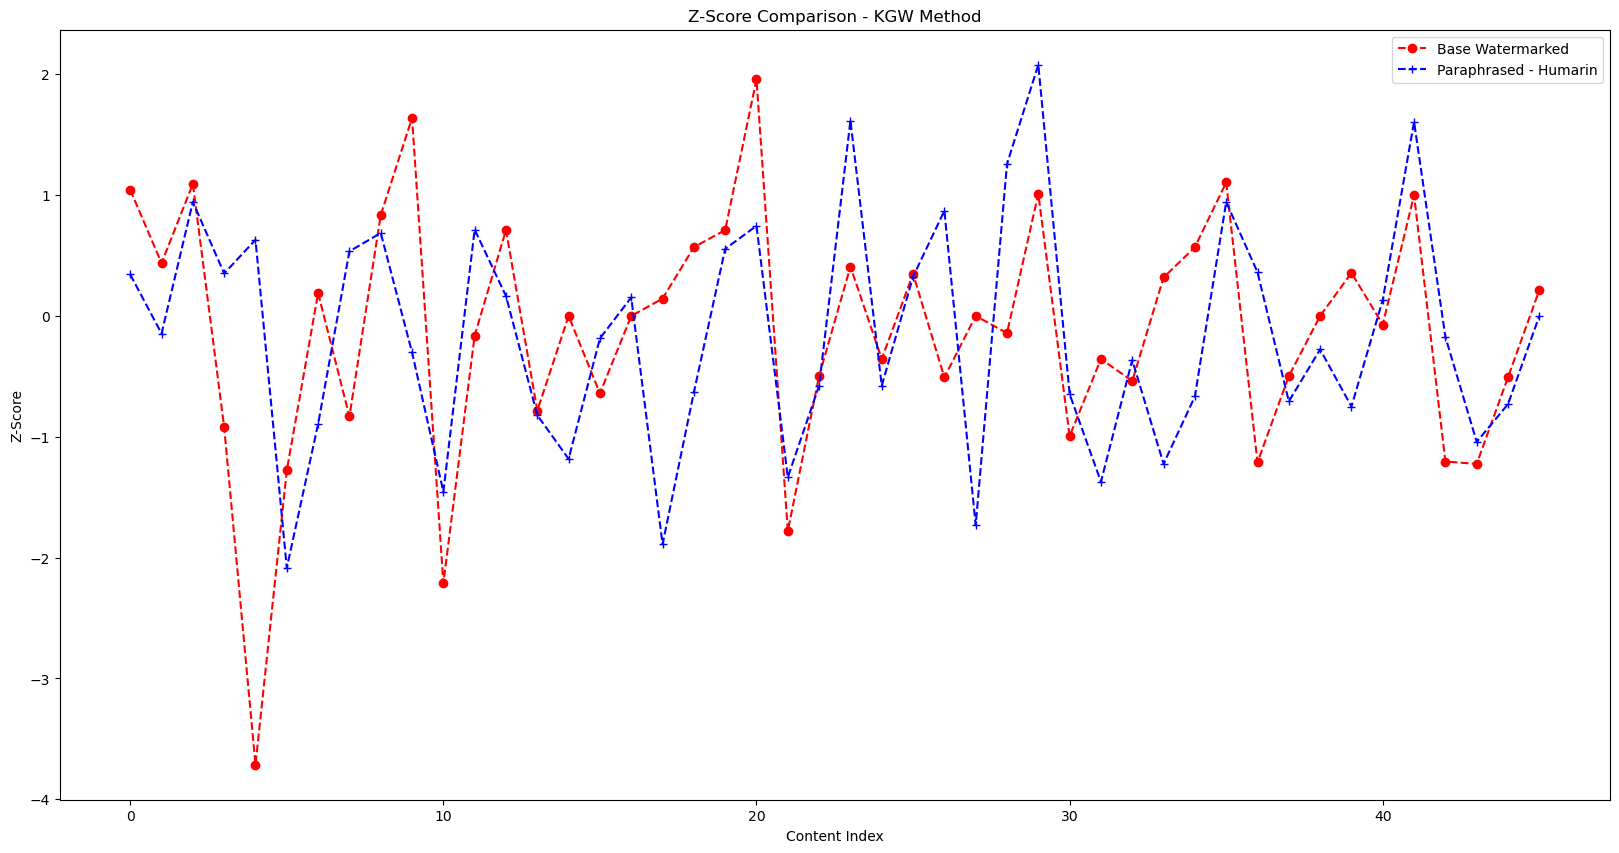

In [40]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(kgw_wm_zscore))), kgw_wm_zscore, label="Base Watermarked", color='red', marker='o', linestyle="dashed")
axs.plot(list(range(len(kgw_wm_pp_zscore))), kgw_wm_pp_zscore, label="Paraphrased - Humarin", color='blue', marker='+', linestyle="dashed")

axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - KGW Method")
axs.legend()
# plt.savefig(image_path+"kgw.png")
plt.show()

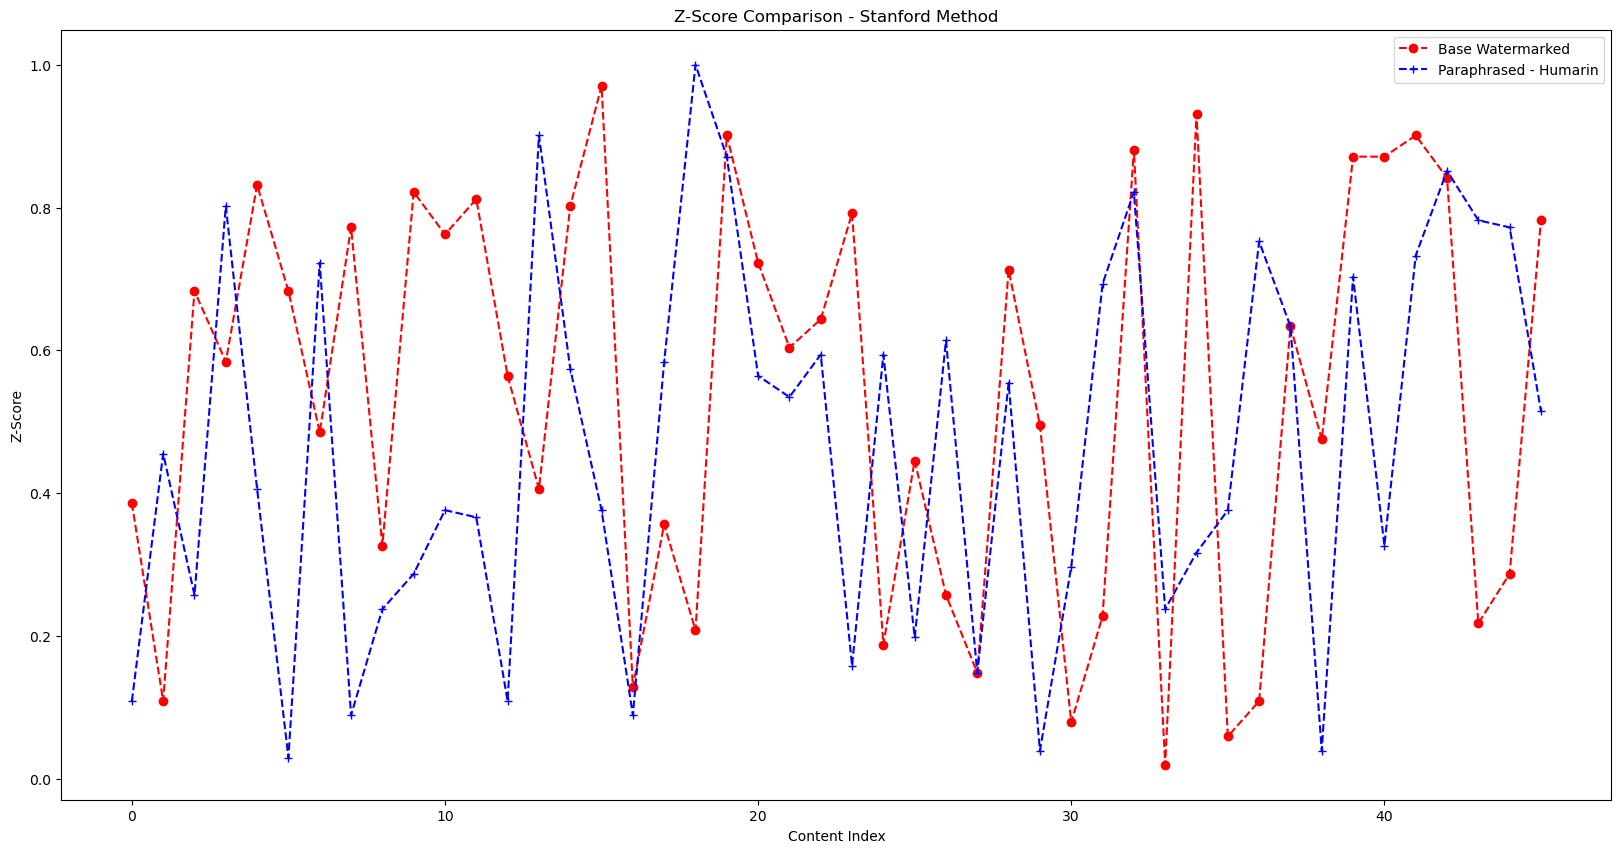

In [41]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(kthl_wm_zscore))), kthl_wm_zscore, label="Base Watermarked", color='red', marker='o', linestyle="dashed")
axs.plot(list(range(len(kthl_wm_pp_zscore))), kthl_wm_pp_zscore, label="Paraphrased - Humarin", color='blue', marker='+', linestyle="dashed")

axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - Stanford Method")
axs.legend()
# plt.savefig(image_path+"kthl.png")
plt.show()